<a href="https://colab.research.google.com/github/joedetDS/misery_index_sub_sahara/blob/main/Final_MI_Sub_Sahara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries

#model
from sklearn.ensemble import RandomForestRegressor

#preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#save model
import joblib

#metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the datasets

df1 = pd.read_excel("/content/Sub_Saharan_Africa_Unemployment_Inflation_1991_2023.xlsx")

df2 = pd.read_csv("/content/sub_saharan_africa_climate_data_1991_2023_v3.csv")

In [3]:
#view the head

df1.head(2)

,year,country,unemployment_rate(%),inflation_rate(%)
0,1991,Angola,10.61,28.28
1,1991,Benin,18.84,15.95


In [4]:
df2.head(2)

,year,country,Avg. Temp (°C),Avg. Wind Speed (m/s),Avg. Humidity (%),Cloud Cover (%),Precipitation (mm),Ocean Heat Content (10²² J),Atmospheric CO₂ (ppm),Ocean pH (Acidification),Sea Level (cm),Glacier Mass Balance (Gt),Arctic Sea Ice Extent (10⁶ km²),Antarctic Sea Ice Extent (10⁶ km²)
0,1991,Angola,21.82,1.84,54.40,68.35,213.44,0.97,372.11,8.10,13.80,-37.69,7.65,2.95
1,1992,Angola,21.23,5.92,45.48,30.87,344.80,0.71,411.81,8.08,23.63,-84.54,8.83,2.96


In [5]:
# Assuming df1 and df2 are already loaded as DataFrames
merged_df = pd.merge(df1, df2, on=['year', 'country'], how='inner')

# Display the first few rows of the merged DataFrame
merged_df.head()

,year,country,unemployment_rate(%),inflation_rate(%),Avg. Temp (°C),Avg. Wind Speed (m/s),Avg. Humidity (%),Cloud Cover (%),Precipitation (mm),Ocean Heat Content (10²² J),Atmospheric CO₂ (ppm),Ocean pH (Acidification),Sea Level (cm),Glacier Mass Balance (Gt),Arctic Sea Ice Extent (10⁶ km²),Antarctic Sea Ice Extent (10⁶ km²)
0,1991,Angola,10.61,28.28,21.82,1.84,54.40,68.35,213.44,0.97,372.11,8.10,13.80,-37.69,7.65,2.95
1,1991,Benin,18.84,15.95,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89
2,1991,Botswana,5.59,0.46,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21
3,1991,Burkina Faso,3.34,25.32,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87
4,1991,Burundi,15.83,19.78,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91


In [6]:
merged_df.columns

Index(['year', 'country', 'unemployment_rate(%)', 'inflation_rate(%)',
       'Avg. Temp (°C)', 'Avg. Wind Speed (m/s)', 'Avg. Humidity (%)',
       'Cloud Cover (%)', 'Precipitation (mm)', 'Ocean Heat Content (10²² J)',
       'Atmospheric CO₂ (ppm)', 'Ocean pH (Acidification)', 'Sea Level (cm)',
       'Glacier Mass Balance (Gt)', 'Arctic Sea Ice Extent (10⁶ km²)',
       'Antarctic Sea Ice Extent (10⁶ km²)'],
      dtype='object')

In [7]:
# Rename columns to lowercase and shorter names
merged_df.columns = [
    'year', 'country', 'unemployment', 'inflation',
    'temp', 'wind_speed', 'humidity', 'cloud_cover',
    'precip', 'ocean_heat', 'co2', 'ocean_ph',
    'sea_level', 'glacier_mass', 'arctic_ice', 'antarctic_ice'
]

# Display the first few rows to confirm the changes
merged_df.head()

,year,country,unemployment,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat,co2,ocean_ph,sea_level,glacier_mass,arctic_ice,antarctic_ice
0,1991,Angola,10.61,28.28,21.82,1.84,54.40,68.35,213.44,0.97,372.11,8.10,13.80,-37.69,7.65,2.95
1,1991,Benin,18.84,15.95,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89
2,1991,Botswana,5.59,0.46,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21
3,1991,Burkina Faso,3.34,25.32,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87
4,1991,Burundi,15.83,19.78,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91


In [8]:
#statistical info of the dataset

merged_df.describe()

,year,unemployment,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat,co2,ocean_ph,sea_level,glacier_mass,arctic_ice,antarctic_ice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,2007.000000,13.226129,12.560627,25.917762,3.519070,58.020317,49.657913,735.635523,1.249725,382.150041,8.153134,14.551887,-50.957679,8.182886,2.498753
std,9.525185,6.772844,10.090157,3.903702,1.460399,17.302016,11.380286,484.613501,0.726245,18.626109,0.085453,8.634633,28.842445,1.011682,0.282159
min,1991.000000,2.000000,-4.950000,15.050000,1.000000,10.160000,30.010000,2.650000,0.000000,350.010000,8.000000,0.010000,-99.990000,6.500000,2.000000
25%,1999.000000,7.225000,4.020000,23.077500,2.230000,46.250000,40.047500,356.677500,0.610000,365.287500,8.080000,6.957500,-76.090000,7.270000,2.260000
50%,2007.000000,13.335000,12.445000,25.775000,3.555000,57.705000,49.030000,633.775000,1.270000,382.470000,8.150000,14.355000,-52.480000,8.170000,2.500000
75%,2015.000000,18.975000,21.220000,28.397500,4.800000,70.892500,59.525000,1077.590000,1.860000,397.785000,8.230000,21.905000,-25.297500,9.050000,2.740000
max,2023.000000,24.990000,29.990000,39.850000,6.000000,89.960000,69.960000,1996.910000,2.500000,414.940000,8.300000,29.940000,-0.010000,10.000000,3.000000


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1452 non-null   int64  
 1   country        1452 non-null   object 
 2   unemployment   1452 non-null   float64
 3   inflation      1452 non-null   float64
 4   temp           1452 non-null   float64
 5   wind_speed     1452 non-null   float64
 6   humidity       1452 non-null   float64
 7   cloud_cover    1452 non-null   float64
 8   precip         1452 non-null   float64
 9   ocean_heat     1452 non-null   float64
 10  co2            1452 non-null   float64
 11  ocean_ph       1452 non-null   float64
 12  sea_level      1452 non-null   float64
 13  glacier_mass   1452 non-null   float64
 14  arctic_ice     1452 non-null   float64
 15  antarctic_ice  1452 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 181.6+ KB


In [10]:
# Create the Misery Index by adding 'inflation' and 'unemployment'
merged_df['misery_index'] = merged_df['inflation'] + merged_df['unemployment']

In [11]:
merged_df.head()

,year,country,unemployment,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat,co2,ocean_ph,sea_level,glacier_mass,arctic_ice,antarctic_ice,misery_index
0,1991,Angola,10.61,28.28,21.82,1.84,54.40,68.35,213.44,0.97,372.11,8.10,13.80,-37.69,7.65,2.95,38.89
1,1991,Benin,18.84,15.95,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89,34.79
2,1991,Botswana,5.59,0.46,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21,6.05
3,1991,Burkina Faso,3.34,25.32,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87,28.66
4,1991,Burundi,15.83,19.78,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91,35.61


In [12]:
merged_df

,year,country,unemployment,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat,co2,ocean_ph,sea_level,glacier_mass,arctic_ice,antarctic_ice,misery_index
0,1991,Angola,10.61,28.28,21.82,1.84,54.40,68.35,213.44,0.97,372.11,8.10,13.80,-37.69,7.65,2.95,38.89
1,1991,Benin,18.84,15.95,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89,34.79
2,1991,Botswana,5.59,0.46,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21,6.05
3,1991,Burkina Faso,3.34,25.32,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87,28.66
4,1991,Burundi,15.83,19.78,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91,35.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2023,Sudan,3.92,-4.33,21.71,5.55,51.86,50.84,350.51,2.19,387.56,8.05,9.62,-23.12,9.84,2.35,-0.41
1448,2023,Togo,7.56,7.40,27.72,4.14,69.73,67.16,929.23,1.89,394.56,8.07,29.94,-67.26,9.36,2.89,14.96
1449,2023,Uganda,4.42,2.78,26.50,4.53,76.34,32.90,1336.26,1.18,408.78,8.18,2.55,-90.72,8.80,2.09,7.20
1450,2023,Zambia,13.94,16.27,28.37,2.69,57.52,65.07,445.29,2.14,354.28,8.30,10.08,-55.40,9.21,2.45,30.21


In [13]:
# Select climatic columns (if your data includes other columns, select only the relevant ones)
climatic_columns = [ 'temp', 'wind_speed', 'humidity', 'cloud_cover',
    'precip', 'ocean_heat', 'co2', 'ocean_ph', 'sea_level', 'glacier_mass',
    'arctic_ice', 'antarctic_ice', 'misery_index'
]

# Calculate the simple average for each row (i.e., each sample)
merged_df['climate'] = merged_df[climatic_columns].mean(axis=1)

In [14]:
merged_df.columns

Index(['year', 'country', 'unemployment', 'inflation', 'temp', 'wind_speed',
       'humidity', 'cloud_cover', 'precip', 'ocean_heat', 'co2', 'ocean_ph',
       'sea_level', 'glacier_mass', 'arctic_ice', 'antarctic_ice',
       'misery_index', 'climate'],
      dtype='object')

In [15]:
# Selecting features and target variable
X = merged_df[['unemployment', 'inflation', 'climate']] # Dropping country, year, and target column
y = merged_df['misery_index']

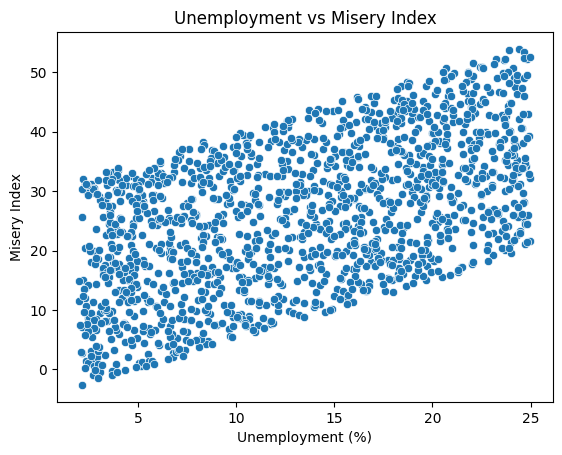

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Unemployment vs Misery Index
sns.scatterplot(x=merged_df['unemployment'], y=y)
plt.title('Unemployment vs Misery Index')
plt.xlabel('Unemployment (%)')
plt.ylabel('Misery Index')
plt.show()


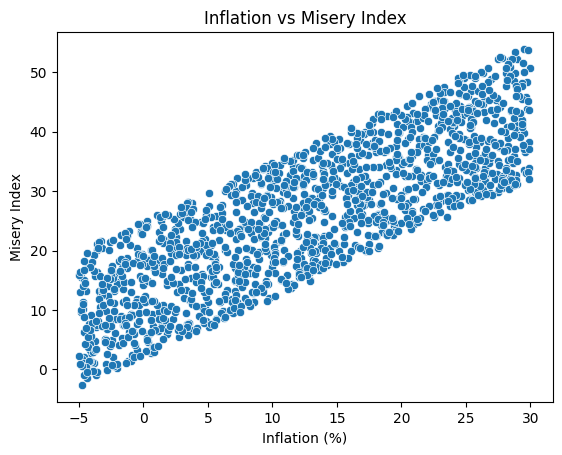

In [17]:
# Scatter plot: Inflation vs Misery Index
sns.scatterplot(x=merged_df['inflation'], y=y)
plt.title('Inflation vs Misery Index')
plt.xlabel('Inflation (%)')
plt.ylabel('Misery Index')
plt.show()


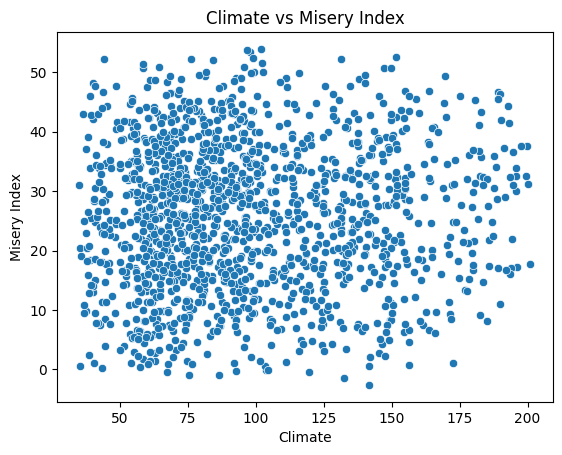

In [18]:
# Scatter plot: Combined Climatic vs Misery Index
sns.scatterplot(x=merged_df['climate'], y=y)
plt.title('Climate vs Misery Index')
plt.xlabel('Climate')
plt.ylabel('Misery Index')
plt.show()


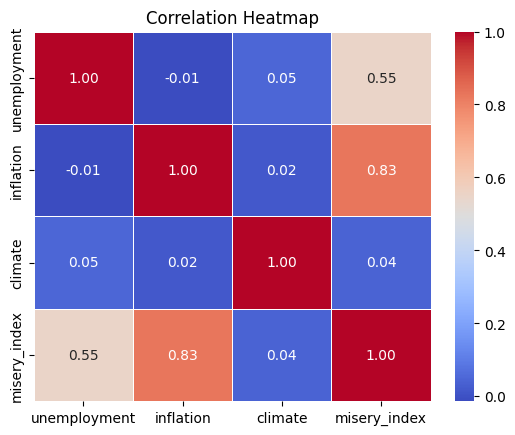

In [19]:
# Correlation heatmap
corr_matrix = merged_df[['unemployment', 'inflation', 'climate', 'misery_index']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

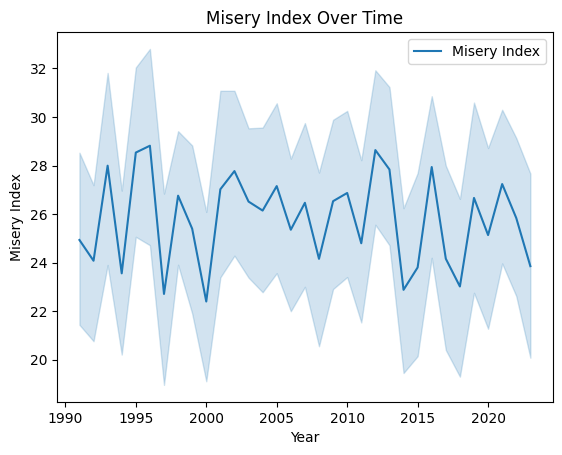

In [20]:
sns.lineplot(x=merged_df['year'], y=y, label='Misery Index')
plt.title('Misery Index Over Time')
plt.xlabel('Year')
plt.ylabel('Misery Index')
plt.show()


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Squared Error (MSE): 0.23064750567779863
R-squared: 0.9983423856968038


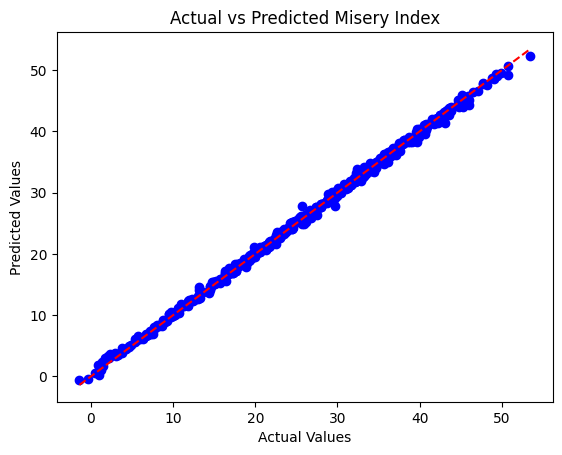

In [22]:
# Visualizing predictions vs actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Misery Index')
plt.show()

In [23]:
# Save the trained model
joblib.dump(model, 'misery_index_model.pkl')

['misery_index_model.pkl']

In [24]:
# Load the saved model
loaded_model = joblib.load('misery_index_model.pkl')

# Select the first row for prediction (excluding 'misery_index', 'country', 'year')
first_row = merged_df[['unemployment', 'inflation', 'climate']].iloc[0]

first_row

,0
unemployment,10.610000
inflation,28.280000
climate,58.971538


In [25]:
# Reshape the first row to match the model input shape (as the model expects 2D array)
first_row = first_row.values.reshape(1, -1)

# Perform prediction on the first row
predicted_misery_index = loaded_model.predict(first_row)

# Output the predicted misery index
print(f'Predicted Misery Index for the first row: {predicted_misery_index[0]}')

Predicted Misery Index for the first row: 38.91069999999998


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [26]:
merged_df[['unemployment', 'inflation', 'climate','misery_index']]

,unemployment,inflation,climate,misery_index
0,10.61,28.28,58.971538,38.89
1,18.84,15.95,98.227692,34.79
2,5.59,0.46,53.901538,6.05
3,3.34,25.32,58.738462,28.66
4,15.83,19.78,55.981538,35.61
...,...,...,...,...
1447,3.92,-4.33,67.426923,-0.41
1448,7.56,7.40,114.799231,14.96
1449,4.42,2.78,140.353077,7.20
1450,13.94,16.27,73.862308,30.21
